# LetsGrowMore #MAY2023
# Author - Balaji Bathini

Task-2: Prediction using Decision Tree Algorithm

Level : Intermediate 

Language-Python

Software-  VS code



Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading The Data Set

In [3]:
data=pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Getting the Size of Data

In [4]:
data.shape

(149, 5)

In [5]:
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

Checking for Null Values


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
data.isnull().sum()


SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

Getting some Statistical Inference from the Data


In [8]:
data.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.848322,3.051007,3.774497,1.205369,NaN
std,0.828594,0.433499,1.759651,0.761292,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Data Visualization


In [9]:

count = data['Species'].value_counts()
count.to_frame()

,count
Species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,49


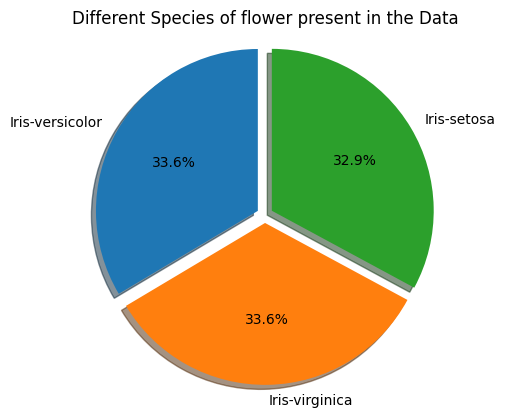

In [10]:
label = count.index.tolist()
val = count.values.tolist()
     

exp = (0.05,0.05,0.05)
fig,ax = plt.subplots()
ax.pie(val, explode=exp, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Different Species of flower present in the Data")
ax.axis('equal')
plt.show()

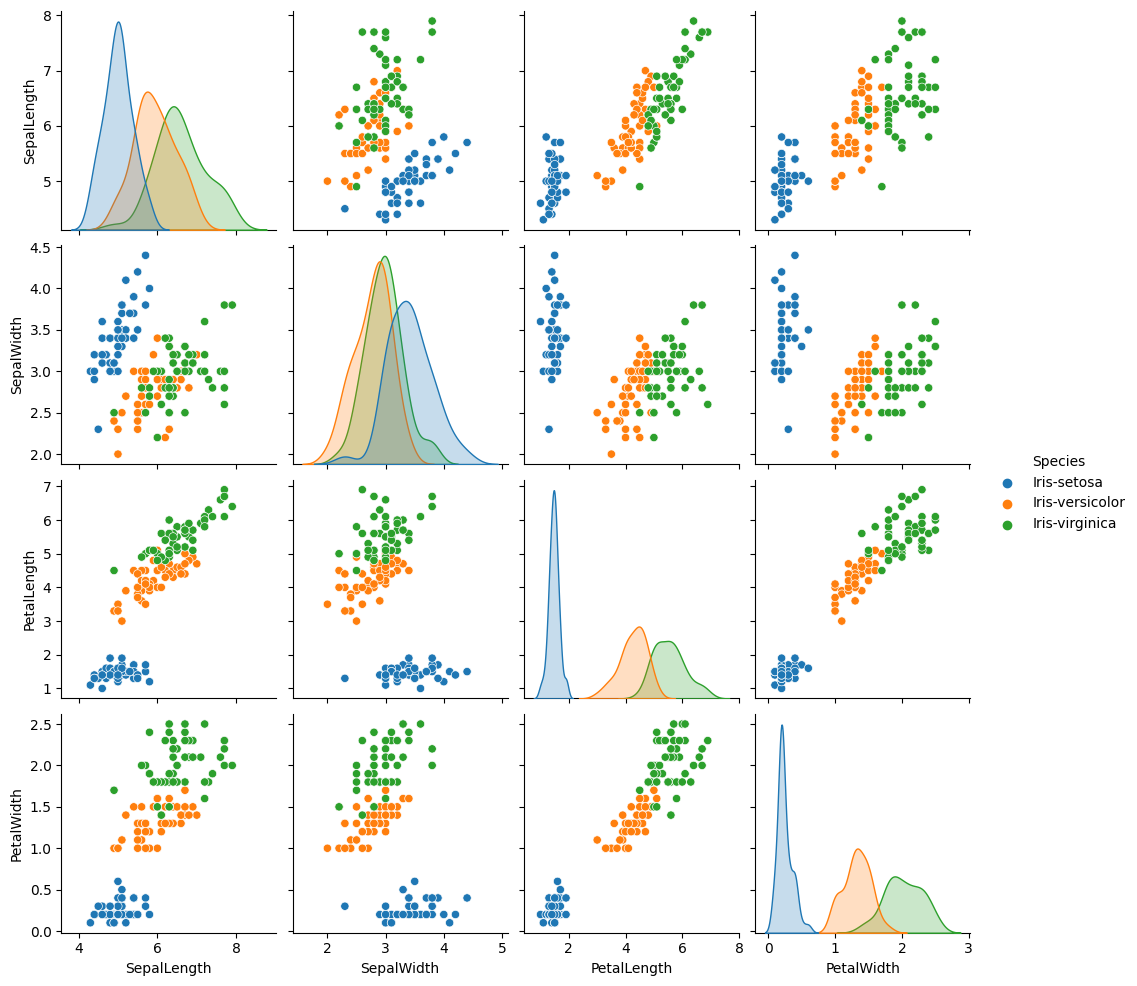

In [14]:
sns.pairplot(data=data, hue='Species')
plt.show()

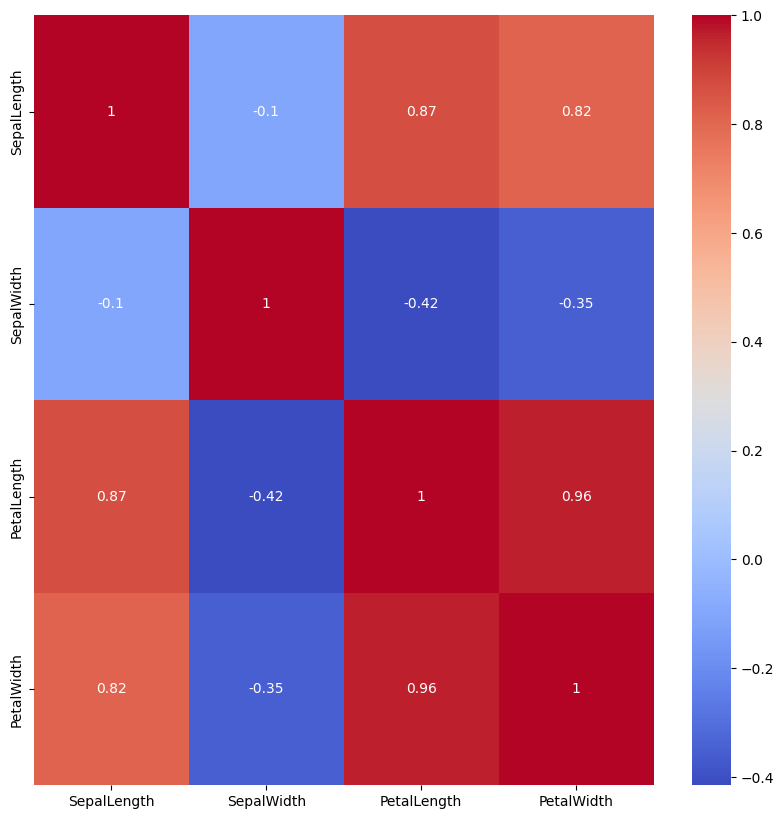

In [16]:
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_data.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

plt.show()  

Data Preparation


In [18]:

x = data.iloc[:, 0:4]
x.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [19]:

y = (data.iloc[:, 4])
y.head().to_frame()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [20]:
from sklearn.preprocessing import StandardScaler
     

std = StandardScaler()
x = std.fit_transform(x)
     

from sklearn.model_selection import train_test_split
     

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

Model Creation



In [21]:
from sklearn.tree import DecisionTreeClassifier
     

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

Prediction using the Created Model



In [22]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Model Evaluation



In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
     

acc = accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")

The Accuracy of the Decision Tree Algorithms is :  95.55555555555556%


In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [25]:

lst = data['Species'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,16,0,0
Iris-versicolor,0,15,1
Iris-virginica,0,1,12


Data Visualization for the Model

In [26]:


data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [27]:

col = data.columns.tolist()
print(col)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']


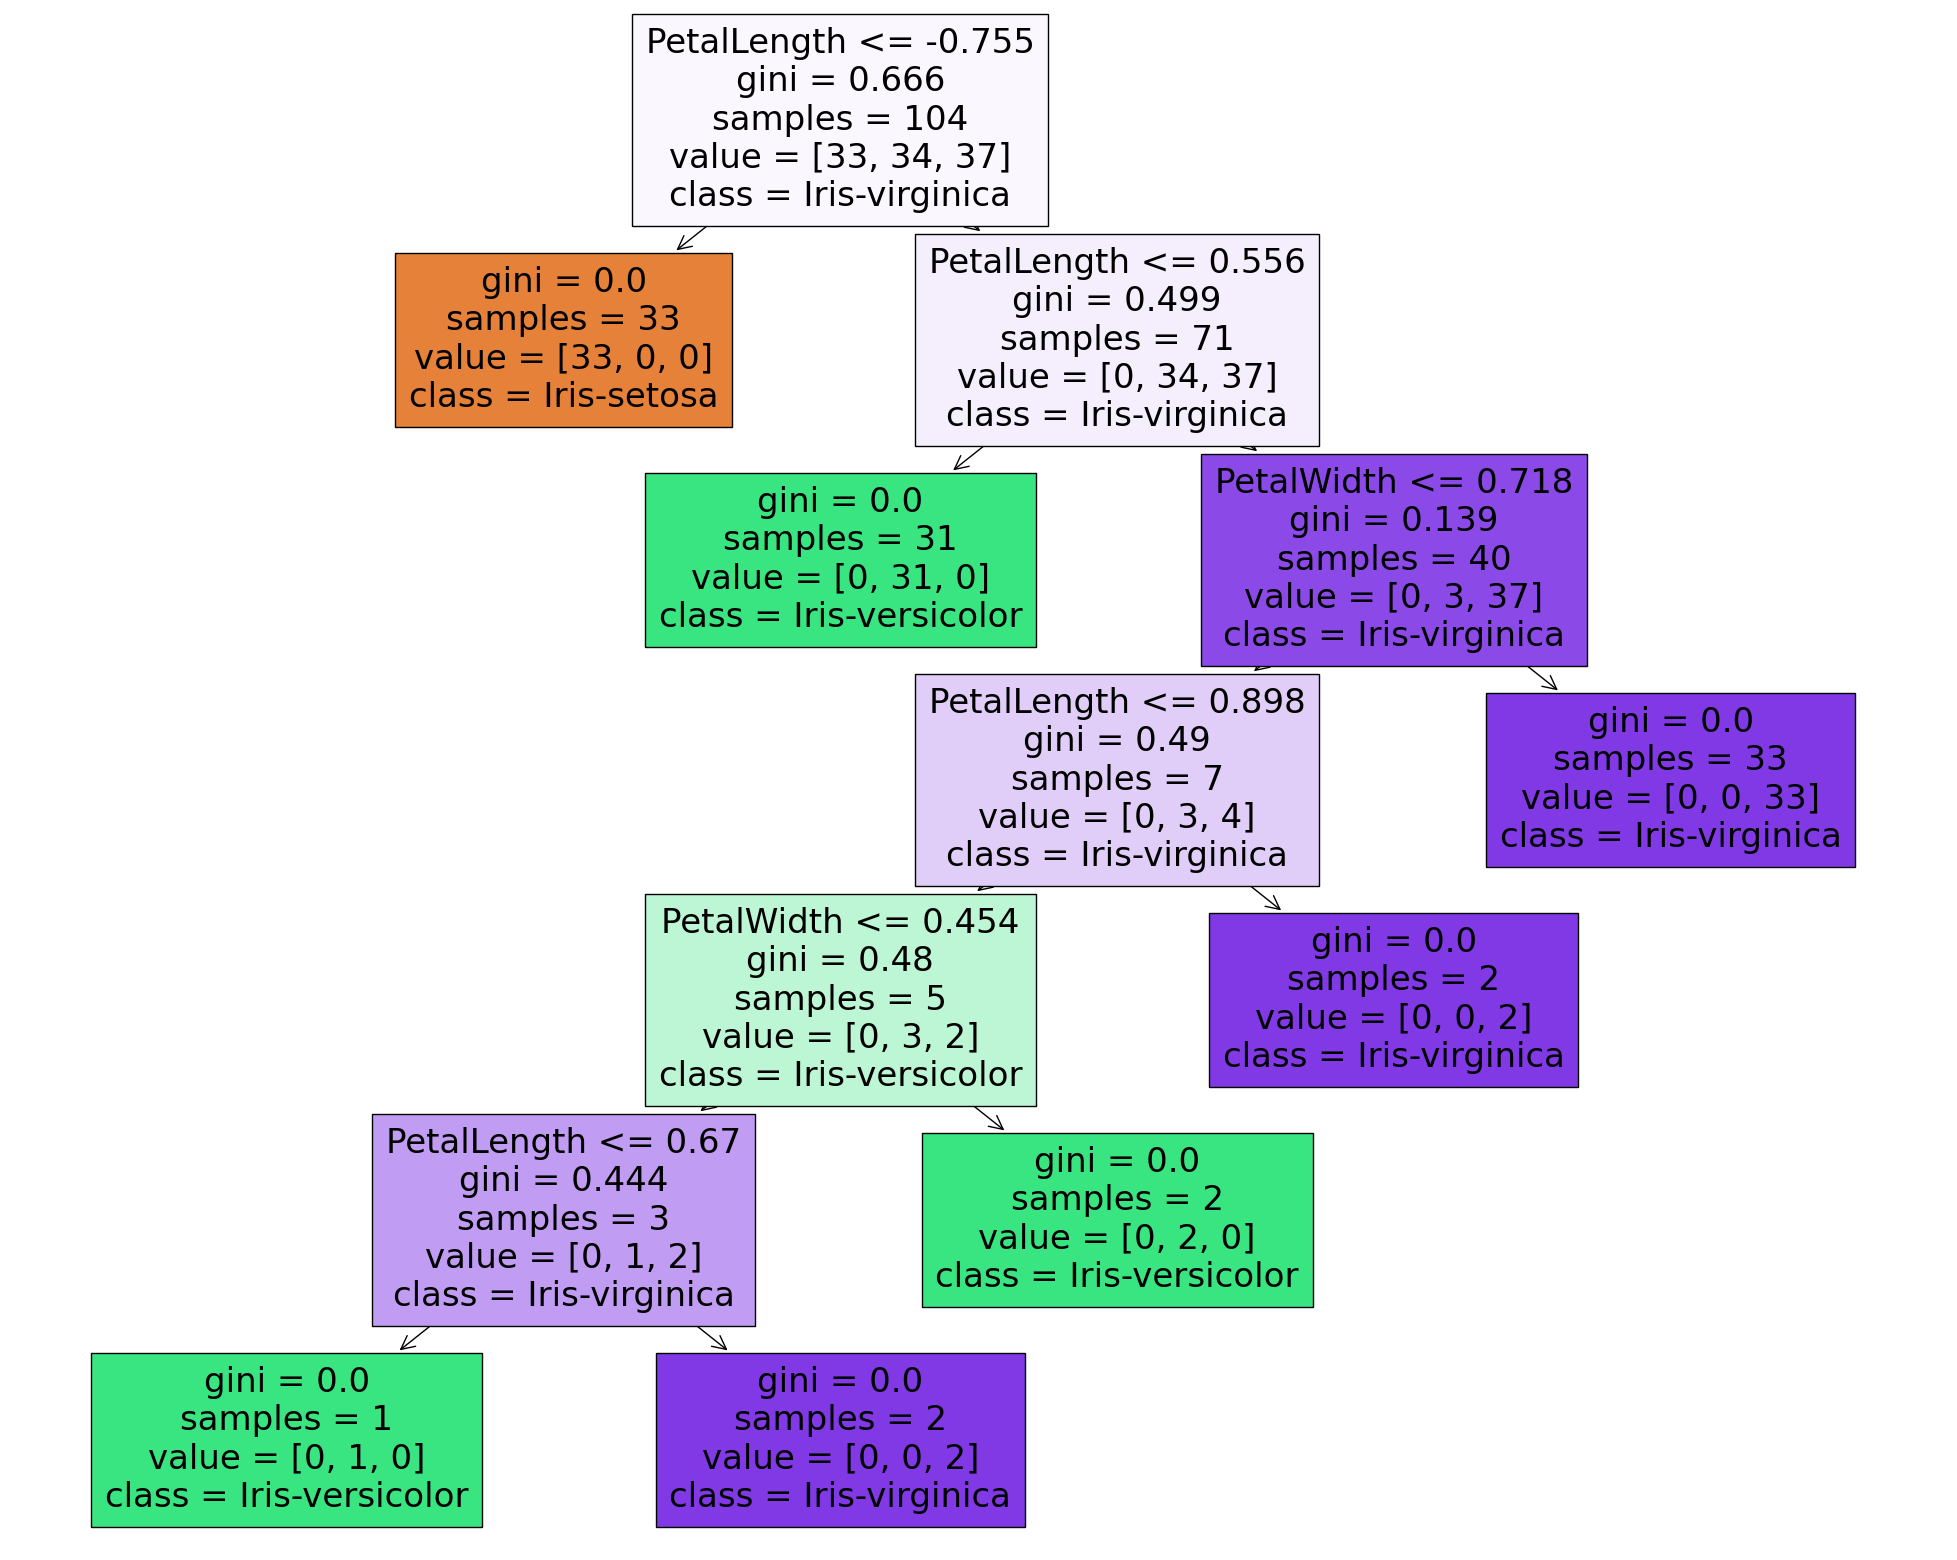

In [28]:
from sklearn.tree import plot_tree
     

fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)

# Conclusion:
The Decision Tree algorithm effectively classifies the Iris dataset's flowers into distinct species based on their petal and sepal measurements.The algorithm's interpretability allows for clear visualization and understanding of the decision-making process behind the classification.Decision Trees offer a reliable and accurate approach for predicting the species of Iris flowers, making them a valuable tool in classification tasks.